A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

1- dealing with many object datatype columns

In [654]:
import warnings
warnings.filterwarnings("ignore")

In [655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets

In [656]:
train_data = pd.read_csv('C:\\Users\\17144\\Documents\\DS\\SAURABH\\projects\\imbalance dataset\\job change\\aug_train.csv')
test_data = pd.read_csv('C:\\Users\\17144\\Documents\\DS\\SAURABH\\projects\\imbalance dataset\\job change\\aug_test.csv')

# EDA

In [657]:
train_data.shape

(19158, 14)

In [658]:
test_data.shape

(2129, 13)

In [659]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [660]:
test_data.head()
#there is no target column in test_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [661]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [662]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

There are many object data type in the dataset

In [663]:
train_data['target'].isnull().any()

False

In [664]:
train_data['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

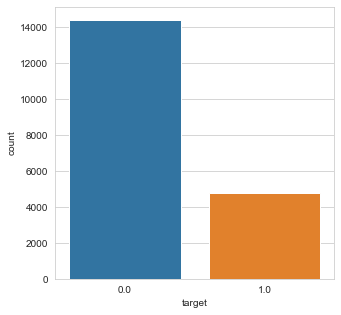

In [665]:
fig= plt.figure(figsize= (5,5))
sns.set_style('whitegrid')
sns.countplot(x=train_data['target'])

check null 

In [666]:
train_data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

There are null values in gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job

In [669]:
train_data.isnull().sum()[train_data.isnull().sum()>0]

gender                 4508
enrolled_university     386
education_level         460
major_discipline       2813
experience               65
company_size           5938
company_type           6140
last_new_job            423
dtype: int64

In [670]:
#percentage of null data in each column over train_data
train_data.isnull().sum()[train_data.isnull().sum()>0]/len(train_data) *100

gender                 23.530640
enrolled_university     2.014824
education_level         2.401086
major_discipline       14.683161
experience              0.339284
company_size           30.994885
company_type           32.049274
last_new_job            2.207955
dtype: float64

Percentage of null data is high. so droping columns with null is not a good solution

In [671]:
train_data['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [672]:
train_data['gender'].value_counts(dropna= True)

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [673]:
# fill nan values with mode
train_data['gender'].fillna(train_data['gender'].mode()[0], inplace = True)

In [674]:
train_data['gender'].isnull().sum()

0

In [675]:
train_data['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [676]:
train_data['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [677]:
train_data['enrolled_university'].fillna(train_data['enrolled_university'].mode()[0], inplace= True)

In [678]:
train_data['enrolled_university'].isnull().sum()

0

In [679]:
train_data['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [680]:
train_data['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [681]:
train_data['education_level'].fillna(train_data['education_level'].mode()[0], inplace= True)

In [682]:
train_data['education_level'].isnull().sum()

0

In [683]:
train_data['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [684]:
train_data['major_discipline'].fillna('STEM', inplace=True)

In [685]:
train_data['major_discipline'].isnull().sum()

0

In [686]:
train_data['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [687]:
train_data['experience'].fillna(train_data['experience'].mode(), inplace= True)

In [688]:
train_data.dropna(subset =['experience'], inplace = True )

In [689]:
train_data['experience'].isnull().sum()

0

In [690]:
train_data['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [691]:
train_data['company_size'].value_counts()

50-99        3078
100-500      2563
10000+       2011
10/49        1466
1000-4999    1323
<10          1304
500-999       874
5000-9999     559
Name: company_size, dtype: int64

In [692]:
train_data['company_size'].fillna('55-99', inplace= True)

In [693]:
train_data['company_size'].isnull().sum()

0

In [694]:
train_data['company_type'].value_counts()

Pvt Ltd                9796
Funded Startup          999
Public Sector           953
Early Stage Startup     601
NGO                     519
Other                   121
Name: company_type, dtype: int64

In [695]:
train_data['company_type'].fillna('Pvt Ltd', inplace= True)

In [696]:
train_data['company_type'].isnull().sum()

0

In [697]:
train_data['last_new_job'].value_counts()

1        8019
>4       3283
2        2897
never    2444
4        1028
3        1023
Name: last_new_job, dtype: int64

In [698]:
train_data['last_new_job'].fillna('1', inplace= True)

In [699]:
train_data['last_new_job'].isnull().sum()

0

In [700]:
train_data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# Feature engineering

In [701]:
train_data['target'].unique()

array([1., 0.])

In [702]:
train_data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

Labeling columns

In [703]:
drop_cols = ['enrollee_id', 'city_development_index']

In [704]:
train_data.drop(drop_cols, axis= 1, inplace= True)

In [705]:
def object_cols(df):
    return list(df.select_dtypes(include= 'object').columns)
def numerical_cols(df):
    return list(df.select_dtypes(exclude='object').columns)

In [706]:
obj_cols = object_cols(train_data)
obj_cols

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [707]:
num_cols = numerical_cols(train_data)
num_cols

['training_hours', 'target']

In [708]:
num_cols.remove('target')

In [709]:
num_cols

['training_hours']

In [710]:
train_data['relevent_experience'].value_counts()

Has relevent experience    13748
No relevent experience      5345
Name: relevent_experience, dtype: int64

In [711]:
train_data['relevent_experience'].isnull().sum()

0

<AxesSubplot:xlabel='relevent_experience', ylabel='target'>

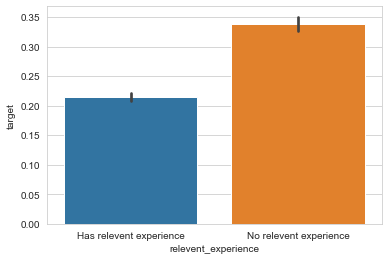

In [712]:
sns.barplot(data= train_data, x= 'relevent_experience', y= 'target')

In [713]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19093 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 19093 non-null  object 
 1   gender               19093 non-null  object 
 2   relevent_experience  19093 non-null  object 
 3   enrolled_university  19093 non-null  object 
 4   education_level      19093 non-null  object 
 5   major_discipline     19093 non-null  object 
 6   experience           19093 non-null  object 
 7   company_size         19093 non-null  object 
 8   company_type         19093 non-null  object 
 9   last_new_job         19093 non-null  object 
 10  training_hours       19093 non-null  int64  
 11  target               19093 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 2.5+ MB


In [714]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer

In [715]:
label_encode = LabelEncoder()

In [716]:
for col in obj_cols:
    train_data[col] = label_encode.fit_transform(train_data[col])

In [717]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19093 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 19093 non-null  int32  
 1   gender               19093 non-null  int32  
 2   relevent_experience  19093 non-null  int32  
 3   enrolled_university  19093 non-null  int32  
 4   education_level      19093 non-null  int32  
 5   major_discipline     19093 non-null  int32  
 6   experience           19093 non-null  int32  
 7   company_size         19093 non-null  int32  
 8   company_type         19093 non-null  int32  
 9   last_new_job         19093 non-null  int32  
 10  training_hours       19093 non-null  int64  
 11  target               19093 non-null  float64
dtypes: float64(1), int32(10), int64(1)
memory usage: 1.8 MB


Normalize data

In [721]:
norm = Normalizer()

In [722]:
X_train_data[num_cols]= norm.fit_transform(X_train_data[num_cols])

In [723]:
train_data.head(3)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5,1,0,2,0,5,21,7,5,0,36,1.0
1,77,1,1,2,0,5,6,4,5,4,47,0.0
2,64,1,1,0,0,5,15,7,5,5,83,0.0


Check correlation

In [729]:
corr_ = train_data.corr()

In [731]:
corr_order= train_data[train_data.columns[1:]].corr()['target'][:]
corr_order.sort_values(ascending= True)

enrolled_university   -0.149202
education_level       -0.083717
last_new_job          -0.024726
training_hours        -0.021919
experience            -0.007502
gender                -0.007154
major_discipline       0.013665
company_type           0.056708
relevent_experience    0.128987
company_size           0.158224
target                 1.000000
Name: target, dtype: float64

sampling

It has been observed that target class has an imbalance. Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [732]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [747]:
train_data['target'].value_counts()

0.0    14339
1.0     4754
Name: target, dtype: int64

In [748]:
X_train_data = train_data.drop(['target'], axis= 1)
y_train_data = train_data['target']

In [752]:
#split the train_data into train and test
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X_train_data, y_train_data, test_size= 0.3, random_state= 7)

In [754]:
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train_data, y_train_data)
# summarize the new class distribution
counter = Counter(y_train_sm)
print(counter)

Counter({1.0: 14339, 0.0: 14339})


# Training Model
- Logistic Regression
- Decision Tree
- Random Forest Classifier
- XGBOOST Classifier